In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [10]:
reviews_1 = pd.read_csv('reviews_1.csv')
reviews_2 = pd.read_csv('reviews_2.csv')

In [3]:
def remove_numerical(text):
    return re.sub(r'\b\d+\b', '', text)
    
def to_lower(text):
    return text.lower()

def remove_url(text):
    return re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\'(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

def remove_email(text):
    return re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

In [4]:
# Ensure necessary resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

def bag_of_words_analysis(texts):
    # Standard English stop words
    stop_words = set(stopwords.words('english'))
    
    # Add custom stop words
    custom_stop_words = ['hotel', 'room', 'stay', 'airport', 'and', 'the', 'i', 'bristol', 
    'stay', 'one', 'hilton', 'said', 'say','to','is','was','for','in','of','The','but','at','a','an','as','had','have','on','from','you','would','will','not','us','we','get','could']  # Add more as needed
    stop_words.update(custom_stop_words)
    
    word_counts = Counter()
    
    for text in texts:
        # Tokenize and convert to lower case
        tokens = word_tokenize(text.lower())
        # Remove stopwords and non-alphabetical tokens
        filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
        # Update word count
        word_counts.update(filtered_tokens)
    
    most_common = word_counts.most_common(20)
    words, counts = zip(*most_common) if most_common else ([], [])
    
    # Plotting
    plt.figure(figsize=(10, 8))
    plt.bar(words, counts)
    plt.title("Top 20 Most Frequent Words")
    plt.xticks(rotation=45)
    plt.show()
    
    return most_common


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nevea\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nevea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


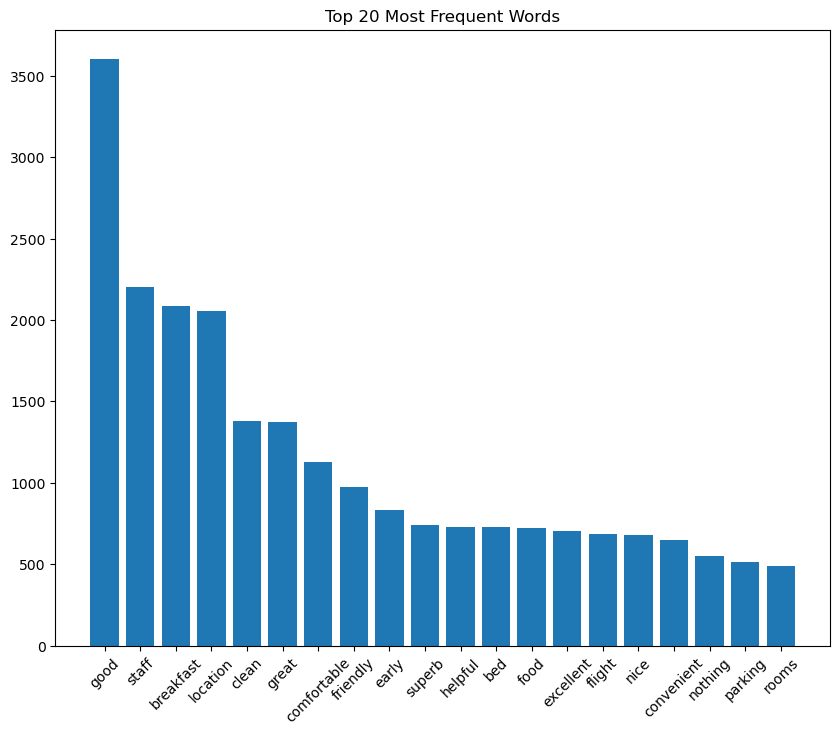

In [5]:
reviews_1['Review'] = reviews_1['Review'] .apply(lambda x: to_lower(x))
reviews_1['Review']  = reviews_1['Review'] .apply(lambda x: remove_url(x))
reviews_1['Review']  = reviews_1['Review'] .apply(lambda x: remove_email(x))
reviews_1['Review']  = reviews_1['Review'] .apply(lambda x: remove_punctuation(x))
reviews_1['Review']  = reviews_1['Review'] .apply(lambda x: remove_numerical(x))
#apply bag of words on reviews_1
most_common_words = bag_of_words_analysis(reviews_1['Review'] )

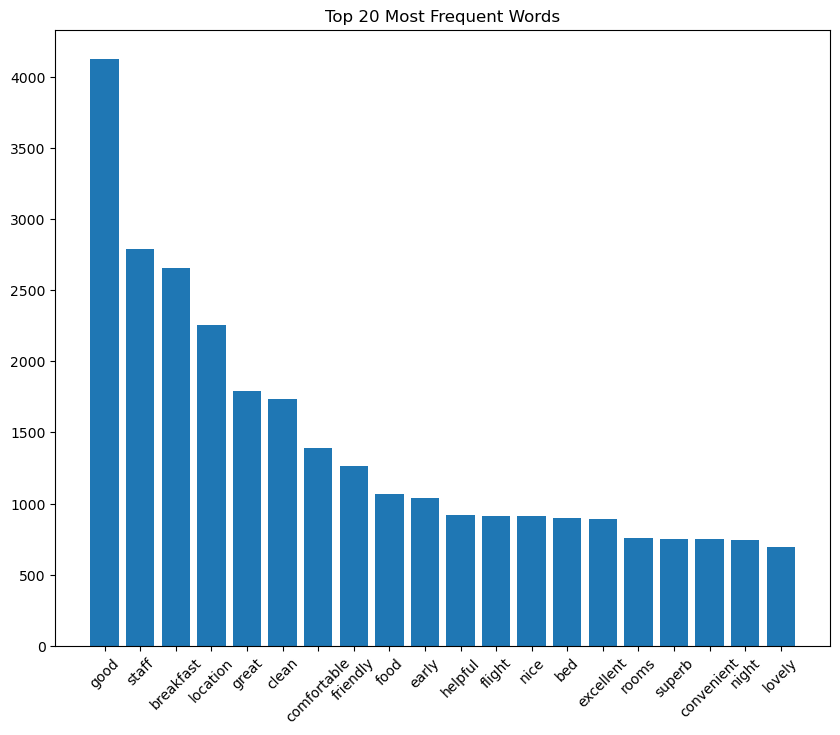

In [6]:
reviews_2['Review'] = reviews_2['Review'] .apply(lambda x: to_lower(x))
reviews_2['Review']  = reviews_2['Review'] .apply(lambda x: remove_url(x))
reviews_2['Review']  = reviews_2['Review'] .apply(lambda x: remove_email(x))
reviews_2['Review']  = reviews_2['Review'] .apply(lambda x: remove_punctuation(x))
reviews_2['Review']  = reviews_2['Review'] .apply(lambda x: remove_numerical(x))
#apply bag of words on reviews_2
most_common_words = bag_of_words_analysis(reviews_2['Review'] )

In [26]:
# Define custom stop words
custom_stop_words = ['hotel', 'room', 'stay', 'airport', 'and', 'the', 'i', 'bristol',
                     'one', 'hilton', 'said', 'say', 'to', 'is', 'was', 'for', 'in', 'of',
                     'the', 'but', 'at', 'a', 'an', 'as', 'had', 'have', 'on', 'from', 'you',
                     'would', 'will', 'not', 'us', 'we', 'get', 'could','na','decepcionante','ll']

# Combine with default English stop words 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
all_stop_words = list(ENGLISH_STOP_WORDS.union(set(custom_stop_words)))

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt

def tf_idf_analysis(texts, top_n=20):
    # Initialize TfidfVectorizer with the combined list of stop words
    vectorizer = TfidfVectorizer(stop_words=all_stop_words)
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_array = np.array(vectorizer.get_feature_names_out())

    # Dictionary to keep track of words and their corresponding scores
    max_tfidf_dict = {}
    for i in range(tfidf_matrix.shape[0]):
        row = tfidf_matrix.getrow(i)
        for word, score in zip(row.indices, row.data):
            feature_word = feature_array[word]
            max_tfidf_dict[feature_word] = max(max_tfidf_dict.get(feature_word, 0), score)

    # Sort words by their score and get top n
    sorted_words = sorted(max_tfidf_dict.items(), key=lambda item: item[1], reverse=True)[:top_n]
    words, scores = zip(*sorted_words)

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.bar(words, scores)
    plt.xlabel('Words')
    plt.ylabel('TF-IDF Score')
    plt.title(f'Top {top_n} Words with Highest TF-IDF Scores')
    plt.xticks(rotation=45)
    plt.show()

    return sorted_words


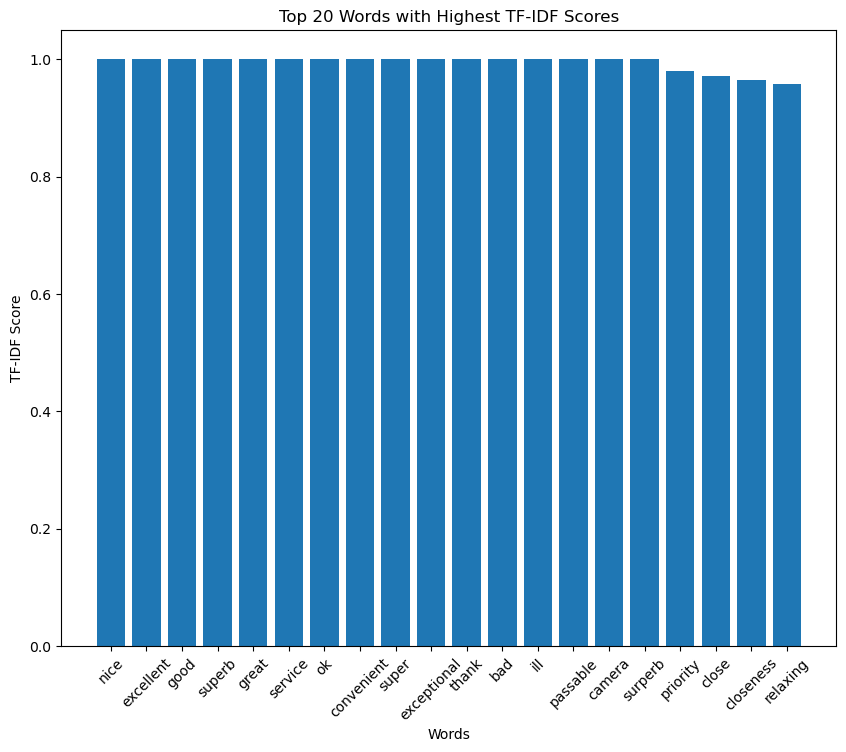

[('nice', 1.0),
 ('excellent', 1.0),
 ('good', 1.0),
 ('superb', 1.0),
 ('great', 1.0),
 ('service', 1.0),
 ('ok', 1.0),
 ('convenient', 1.0),
 ('super', 1.0),
 ('exceptional', 1.0),
 ('thank', 1.0),
 ('bad', 1.0),
 ('ill', 1.0),
 ('passable', 1.0),
 ('camera', 1.0),
 ('surperb', 1.0),
 ('priority', 0.9801279497920542),
 ('close', 0.9722202184352055),
 ('closeness', 0.9649833602150015),
 ('relaxing', 0.9584600417473709)]

In [27]:
tf_idf_analysis(reviews_1['Review'])
#apply tf-idf on reviews_1

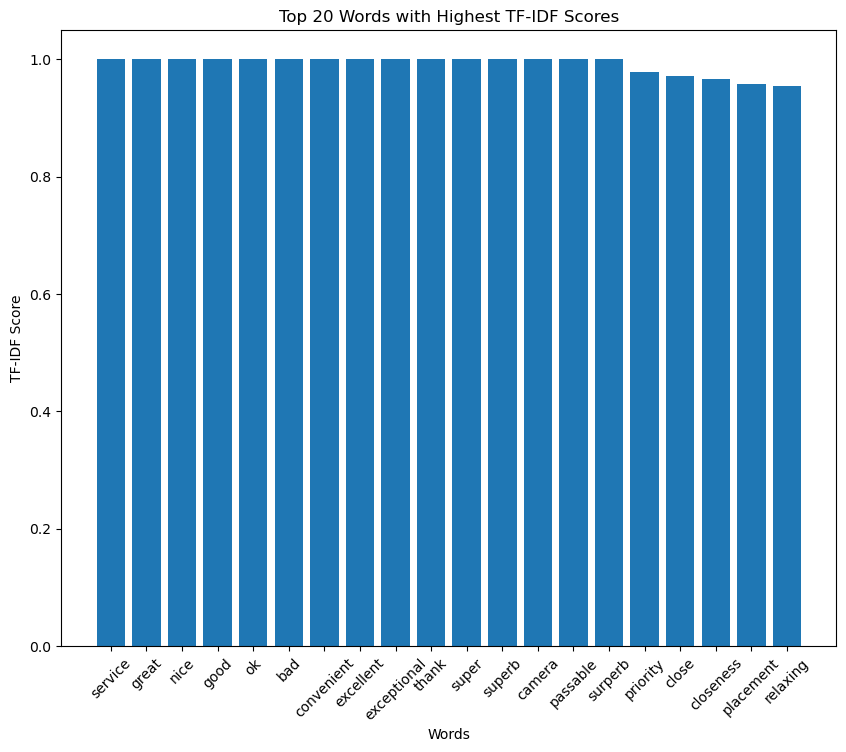

[('service', 1.0),
 ('great', 1.0),
 ('nice', 1.0),
 ('good', 1.0),
 ('ok', 1.0),
 ('bad', 1.0),
 ('convenient', 1.0),
 ('excellent', 1.0),
 ('exceptional', 1.0),
 ('thank', 1.0),
 ('super', 1.0),
 ('superb', 1.0),
 ('camera', 1.0),
 ('passable', 1.0),
 ('surperb', 1.0),
 ('priority', 0.9791575880464782),
 ('close', 0.9716123730631772),
 ('closeness', 0.965899104684539),
 ('placement', 0.9583567831892804),
 ('relaxing', 0.9550079869646566)]

In [28]:
tf_idf_analysis(reviews_2['Review'])
#apply tf-idf on reviews_2